# Heart Disease Prediction Project

In [89]:
import pandas as pd #
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
#This module provides logistic regression classification algorithms, which can be used for binary classification tasks like heart disease prediction.
from sklearn.neighbors import KNeighborsClassifier
#This module provides k-nearest neighbors classification algorithms, which can also be used for classification tasks.
from sklearn.ensemble import RandomForestClassifier
#This module provides random forest classification algorithms, which are ensemble learning methods based on decision trees.
from sklearn.model_selection import train_test_split,cross_val_score
#TThis function computes the cross-validated scores for an estimator.
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
#This module implements randomized search on hyperparameters, which is useful for finding the best hyperparameters for your model.
#This module implements grid search on hyperparameters, another method for hyperparameter tuning
from sklearn.metrics import confusion_matrix,classification_report
#This function computes the confusion matrix to evaluate the accuracy of a classification.
from sklearn.metrics import precision_score,recall_score,f1_score
#This function generates a classification report that includes precision, recall, F1-score, and support.
#This function calculates the precision score of a classification model.
#This function calculates the recall score of a classification model.
#This function calculates the F1-score of a classification model.
from sklearn.metrics import roc_curve, auc 
#This function computes the receiver operating characteristic (ROC) curve, which is useful for evaluating the performance of binary classification models.
#This function computes the area under the ROC curve (AUC), which is a measure of the model's performance.

In [90]:
df = pd.read_csv('C:\\Users\\Data Science\\Desktop\\dataset.csv')
df.shape

(303, 14)

In [91]:
df.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [92]:
df.tail(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0


In [93]:
df['target'].value_counts()
## Counting the occurrences of each unique value in the 'target' column

target
1    165
0    138
Name: count, dtype: int64

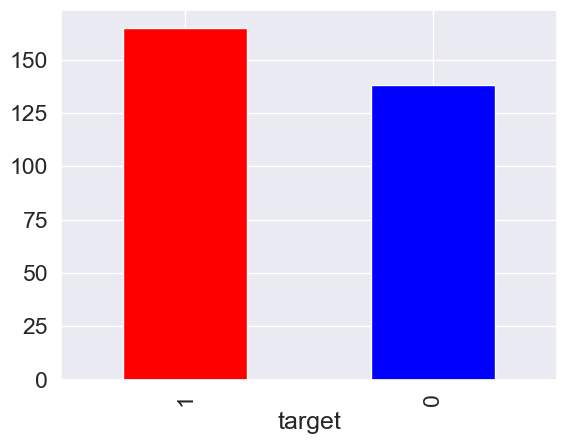

In [94]:
# Plotting the counts of each unique value in the 'target' column as a bar plot
df['target'].value_counts().plot(kind='bar', color=['red','blue']);

In [95]:
# Checking for missing values and summing up the count of missing values for each column
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [96]:
# Generating descriptive statistics for numerical columns in the DataFrame
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [97]:
# Counting the occurrences of each unique value in the 'sex' column
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [98]:
# Getting the number of rows in the DataFrame
len(df)

303

In [99]:
207/303

0.6831683168316832

In [100]:
97/303

0.3201320132013201

In [101]:
# Computing a cross-tabulation of 'target' and 'sex' columns
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [102]:
# Male patient in percent
72/96

0.75

In [103]:
# Female patient in percent
93/207

0.4492753623188406

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

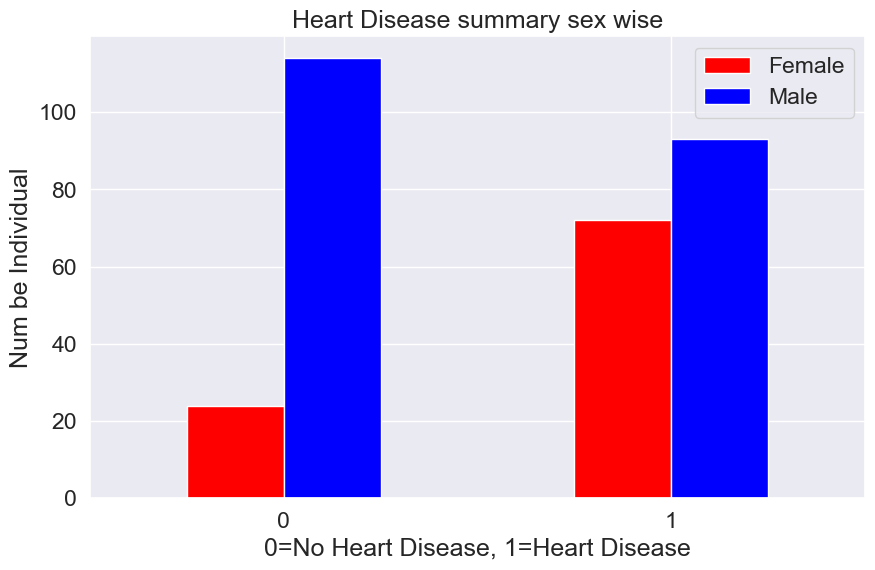

In [104]:
# Creating the cross-tabulation table and plotting it as a bar plot
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['red','blue'])
# Adding title and labels
plt.title('Heart Disease summary sex wise')
plt.xlabel('0=No Heart Disease, 1=Heart Disease')
plt.ylabel('Num be Individual')
plt.legend(['Female','Male'])
plt.xticks(rotation=0) #;

# Be careful with plot choice

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90]),
 [Text(0, 0, '71'),
  Text(1, 0, '88'),
  Text(2, 0, '90'),
  Text(3, 0, '95'),
  Text(4, 0, '96'),
  Text(5, 0, '97'),
  Text(6, 0, '99'),
  Text(7, 0, '103'),
  Text(8, 0, '105'),
  Text(9, 0, '106'),
  Text(10, 0, '108'),
  Text(11, 0, '109'),
  Text(12, 0, '111'),
  Text(13, 0, '112'),
  Text(14, 0, '113'),
  Text(15, 0, '114'),
  Text(16, 0, '115'),
  Text(17, 0, '116'),
  Text(18, 0, '117'),
  Text(19, 0, '118'),
  Text(20, 0, '120'),
  Text(21, 0, '121'),
  Text(22, 0, '122'),
  Text(23, 0, '123'),
  Text(24, 0, '124'),
  Text(25, 0, '125'),
  Text(26, 0, '126'),
  Text(27

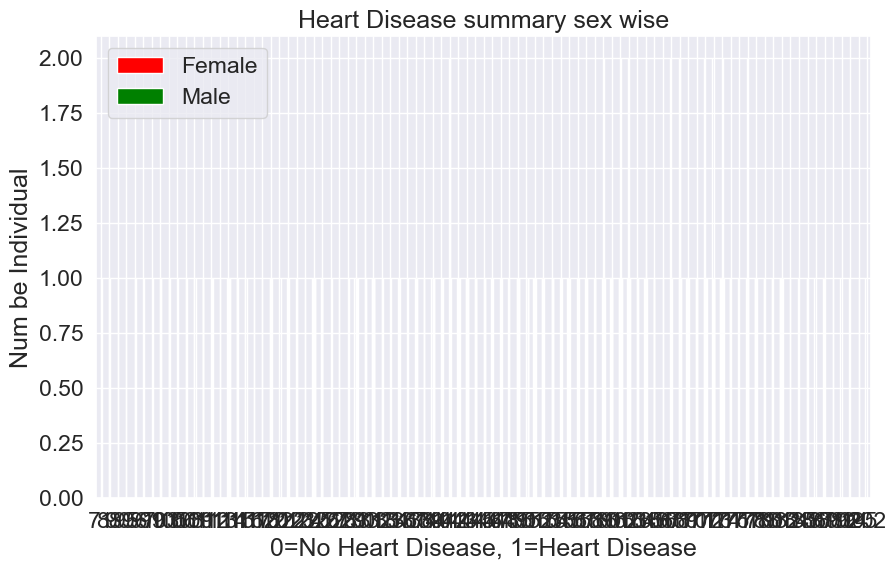

In [138]:
# Creating a scatter plot
pd.crosstab(df.thalach,df.age).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['red','green'])
plt.title('Heart Disease summary sex wise')
plt.xlabel('0=No Heart Disease, 1=Heart Disease')
plt.ylabel('Num be Individual')
plt.legend(['Female','Male'])
plt.xticks(rotation=0) #;;

In [107]:
# Counting the occurrences of each unique value in the 'thalach' column
thalach_value_counts = df['thalach'].value_counts()
print(thalach_value_counts)

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64


# Scatter Plot to see any Pattern

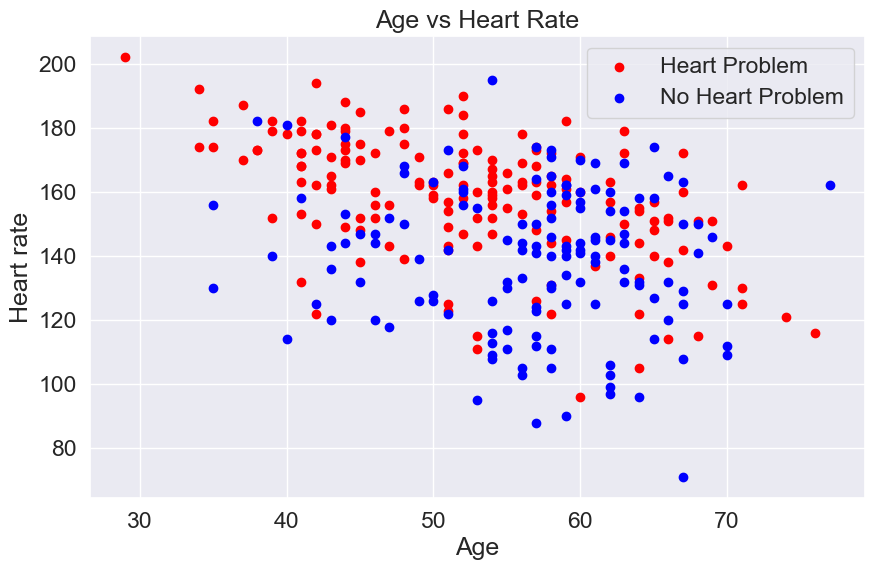

In [108]:
# Finding Patterns in Data Using Scatter Plot
plt.figure(figsize=(10,6)) #This sets the figure size for the plot
# Create scatter plot
# plt.scatter(df.age,df.thalach,c='green'); # for total data
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='red'); # for those who have heart disease
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='blue'); # for those who have not heart disease
plt.title('Age vs Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart rate')
plt.legend(['Heart Problem','No Heart Problem']);

# Age Distribution

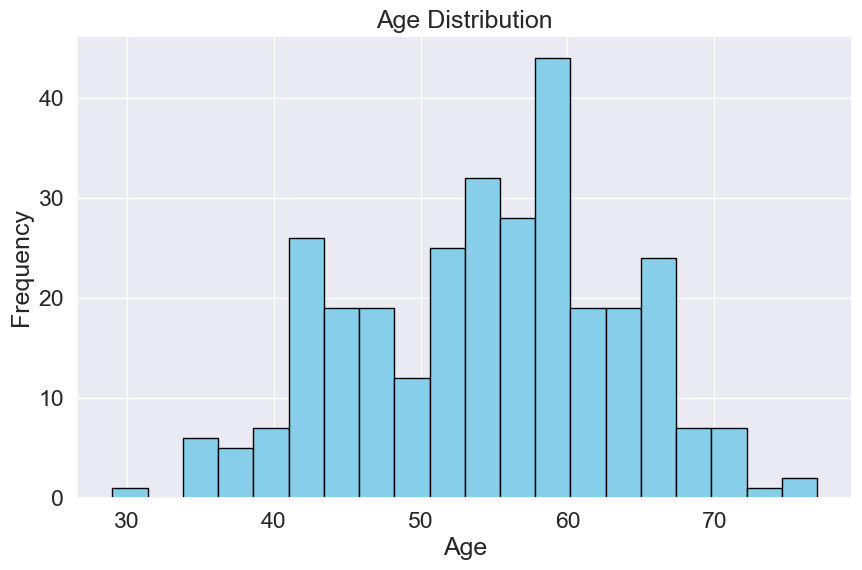

In [109]:

# Creating a histogram of age distribution
plt.figure(figsize=(10, 6))
df['age'].plot.hist(color='skyblue', edgecolor='black', bins=20)  # Adjust the number of bins as needed
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Chest pain type and target relation part 1

In [110]:
# Counting the occurrences of each unique value in the 'cp' column
cp_counts = df['cp'].value_counts()
print(cp_counts)

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64


In [111]:
# Computing a cross-tabulation of 'cp' and 'target' columns
cross_tab = pd.crosstab(df['cp'], df['target'])
print(cross_tab)

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16


# Chest pain type and target relation part 2

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

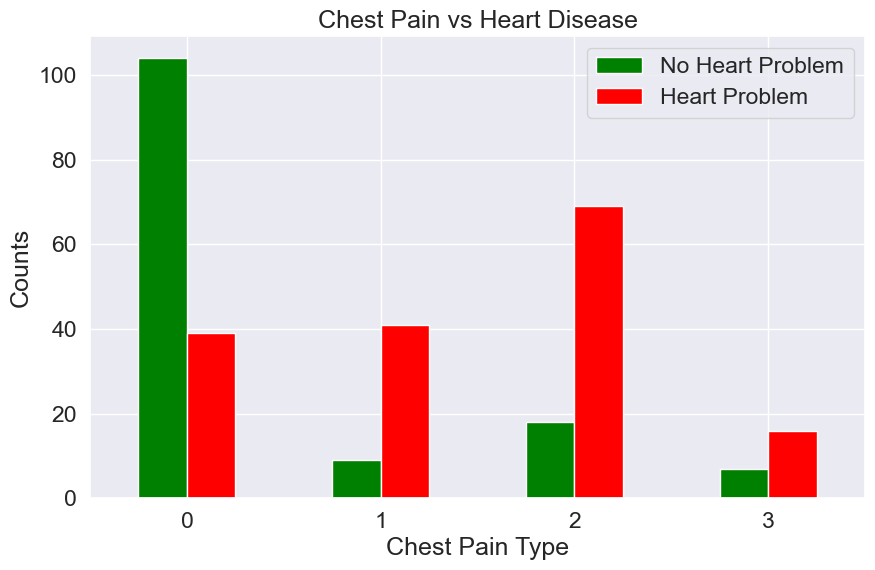

In [112]:
# Creating a cross-tabulation of 'cp' (chest pain type) and 'target' (presence or absence of heart disease)
cross_tab = pd.crosstab(df['cp'], df['target'])

# Plotting the cross-tabulation table as a bar plot
cross_tab.plot(kind='bar', figsize=(10, 6), color=['green', 'red'])

# Setting the title of the plot
plt.title('Chest Pain vs Heart Disease')

# Setting the label for the x-axis
plt.xlabel('Chest Pain Type')

# Setting the label for the y-axis
plt.ylabel('Counts')

# Adding a legend to the plot
plt.legend(['No Heart Problem', 'Heart Problem'])

# Adjusting the rotation of x-axis tick labels
plt.xticks(rotation=0)

# Correlation Matrix Part 1

In [26]:
df.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [113]:
correlation_matrix = df.corr()
print(correlation_matrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

# Correlation Matrix Part 2

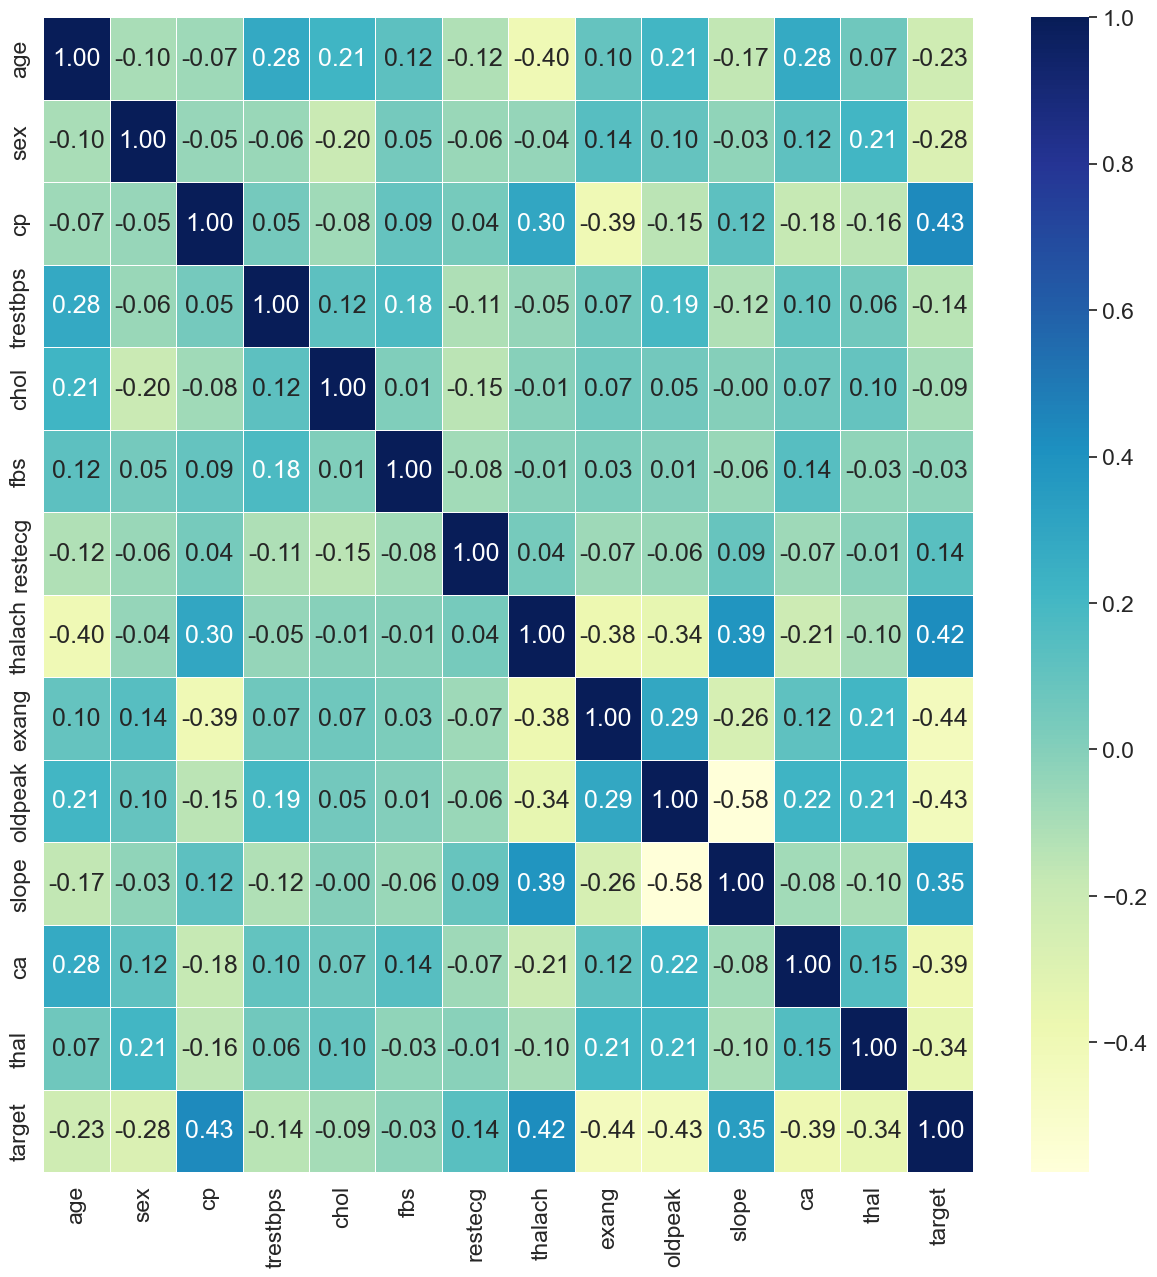

In [116]:
# Computing the correlation matrix for the DataFrame
cor_map = df.corr()

# Creating a figure and axis object with a specified size
home, room = plt.subplots(figsize=(15, 15))

# Generating a heatmap to visualize the correlation matrix
room = sns.heatmap(cor_map,
                   annot=True,           # Displaying annotations (correlation coefficients) on each cell
                   linewidths=0.5,      # Setting the width of the lines that will divide each cell
                   fmt='0.2f',          # Formatting annotations as floating-point numbers with two decimal places
                   cmap='YlGnBu')       # Using the 'YlGnBu' colormap for coloring the heatmap

In [124]:
# Displaying the last 15 rows of the DataFrame
df.tail(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0


In [125]:
# Creating features (independent variables) by dropping the 'target' column
x = df.drop('target', axis=1)

# Creating target variable (dependent variable)
y = df['target']

In [126]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [127]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [128]:
# Setting the random seed to ensure reproducibility of the train-test split
np.random.seed(7)

# Splitting the data into training and testing sets
# x_train: features for training
# x_test: features for testing
# y_train: target variable for training
# y_test: target variable for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [139]:
len(x)

303

In [140]:
len(x_train)

242

In [141]:
242/303

0.7986798679867987

# Choosing the right model
The model we are going to use
1-K-Nearest Neighbors Classifier

2-Random Forest Classifier

3-Logistic Regression

In [142]:
# Putting the value into a dictionary
models = {'KNN':KNeighborsClassifier(),
         'Random Forest':RandomForestClassifier(),
         'Logistic Regression':LogisticRegression()}
# Defining the fit_and_score function
def fit_and_score(models, x_train, x_test, y_train, y_test):
    # Setting a random seed for reproducibility
    np.random.seed(7)
    # Dictionary to store model scores
    model_scores = {}
    # Looping through models
    for name, model in models.items():
        # Fitting the model to the training data
        model.fit(x_train, y_train)
        # Evaluating the model and storing the score
        model_scores[name] = model.score(x_test, y_test)
    return model_scores 

In [38]:
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

C:\Users\Data Science\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.5573770491803278,
 'Random Forest': 0.7213114754098361,
 'Logistic Regression': 0.7377049180327869}

<Axes: >

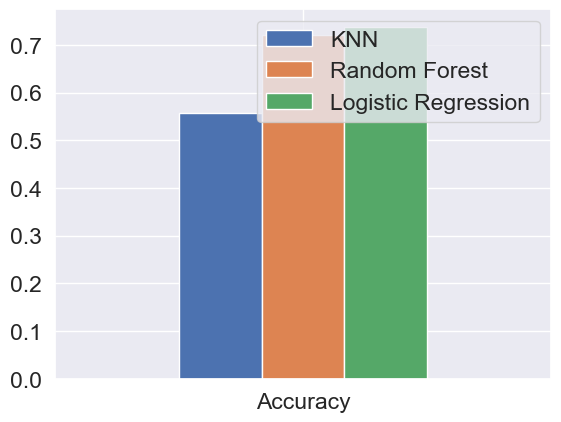

In [130]:
# Creating a DataFrame from the model_scores dictionary
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])

# Plotting the bar plot
model_compare.plot.bar(rot=0)

# Improving Model

Hyperparameter Tuning:
Hyperparameters are settings of the model that are not learned from the data but are set prior to training. Tuning these hyperparameters can significantly impact the model's performance. For KNN, common hyperparameters include n_neighbors, weights, and metric. You can use techniques like grid search or randomized search to find the optimal values for these hyperparameters.

Feature Improvement:
Improving features involves selecting the most relevant features or engineering new features that capture more information about the data. Techniques such as feature scaling, feature selection, and dimensionality reduction (e.g., PCA) can be applied to enhance the model's predictive power.

Confusion Matrix:
A confusion matrix provides a summary of the model's performance by showing the counts of true positive, true negative, false positive, and false negative predictions. It's a useful tool for evaluating the performance of a classification model.

Cross-Validation:
Cross-validation is a technique used to assess the generalization performance of a model. It involves splitting the data into multiple folds, training the model on different subsets of the data, and evaluating its performance on the remaining data. This helps in estimating the model's performance on unseen data.

Precision, Recall, F1-Score, Classification Report:
These are evaluation metrics that provide insights into the model's performance beyond accuracy. Precision measures the proportion of true positive predictions among all positive predictions, recall measures the proportion of true positive predictions among all actual positives, and F1-score is the harmonic mean of precision and recall. A classification report provides a summary of precision, recall, and F1-score for each class in the dataset.

ROC Curve:
ROC (Receiver Operating Characteristic) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It's commonly used in binary classification to assess the trade-off between true positive rate and false positive rate.

In [135]:
# Define KNN classifier
knn = KNeighborsClassifier()

# Define hyperparameters grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform grid search
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [136]:
# Empty lists to store training and testing scores
train_score = []
test_score = []

# Range of values for n_neighbors hyperparameter
n_neighbors_range = range(1, 30)

# Creating an instance of the KNN classifier
KNN = KNeighborsClassifier()

# Looping through each value of n_neighbors
for n_neighbors in n_neighbors_range:
    # Setting the n_neighbors hyperparameter for the KNN classifier
    KNN.set_params(n_neighbors=n_neighbors)
    
    # Training the KNN classifier on the training data
    KNN.fit(x_train, y_train)
    
    # Computing and appending the training score (accuracy)
    train_score.append(KNN.score(x_train, y_train))
    
    # Computing and appending the testing score (accuracy)
    test_score.append(KNN.score(x_test, y_test))


In [137]:
train_score

[1.0,
 0.8099173553719008,
 0.7768595041322314,
 0.756198347107438,
 0.7603305785123967,
 0.731404958677686,
 0.743801652892562,
 0.7148760330578512,
 0.71900826446281,
 0.731404958677686,
 0.7272727272727273,
 0.7231404958677686,
 0.731404958677686,
 0.71900826446281,
 0.7148760330578512,
 0.6900826446280992,
 0.7272727272727273,
 0.71900826446281,
 0.7107438016528925,
 0.7066115702479339,
 0.7024793388429752,
 0.7024793388429752,
 0.7107438016528925,
 0.6900826446280992,
 0.7107438016528925,
 0.7066115702479339,
 0.7107438016528925,
 0.7066115702479339,
 0.7066115702479339]

In [145]:
test_score

[0.6065573770491803,
 0.6557377049180327,
 0.6229508196721312,
 0.6229508196721312,
 0.5573770491803278,
 0.639344262295082,
 0.6721311475409836,
 0.6557377049180327,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.6557377049180327]

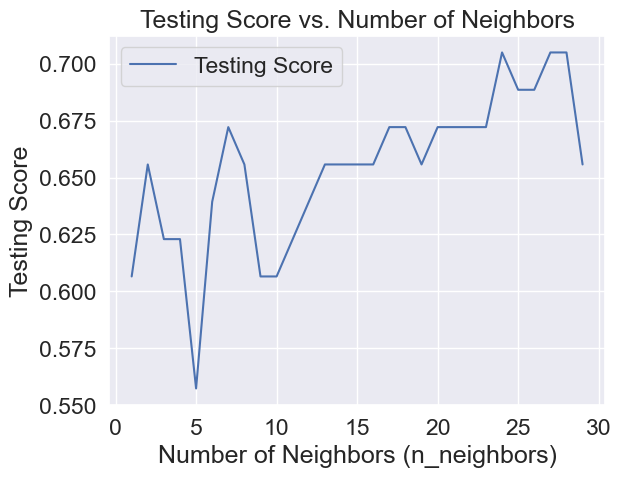

In [146]:
plt.plot(range(1, 30), test_score, label='Testing Score')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Testing Score')
plt.title('Testing Score vs. Number of Neighbors')
plt.legend()
plt.show()

# Plotting the Improve Model score

# Plot the Accuracy Score

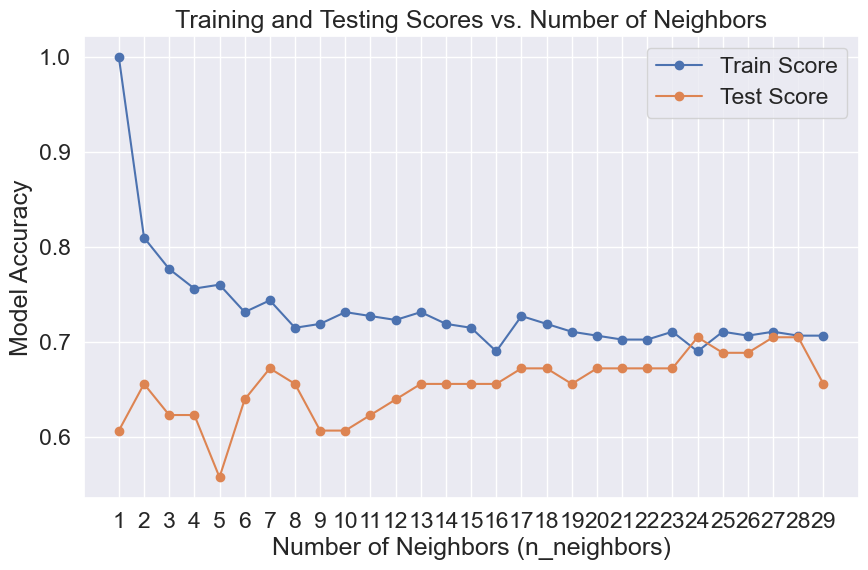

Max KNN Test Score: 70.49% (n_neighbors = 24)


In [147]:
# Plotting the training and testing scores
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_range, train_score, label='Train Score', marker='o')
plt.plot(n_neighbors_range, test_score, label='Test Score', marker='o')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Model Accuracy')
plt.title('Training and Testing Scores vs. Number of Neighbors')
plt.xticks(range(1, 30))
plt.legend()
plt.grid(True)
plt.show()

# Printing the maximum testing score
max_test_score = max(test_score)
max_test_score_index = test_score.index(max_test_score)
print(f'Max KNN Test Score: {max_test_score * 100:.2f}% (n_neighbors = {max_test_score_index + 1})')

# first of all we make the dictionary of hyperparameter of logisticRegression and RandomForestClassifier

In [148]:
LR_hp = {
    'C': np.logspace(-4, 4, 20),  # Range of values for the regularization parameter C
    'solver': ['liblinear']       # List of solvers to be used
}


# hyperparameters for RandomForestClassifier

In [149]:
LR_hp = {
    'C': np.logspace(-4,4,20),
    'solver': ['liblinear']
}
RFC_hp = {
    'n_estimators': np.arange(10, 1600, 100),     # Number of trees in the forest
    'max_depth': [None, 3, 5, 6, 10],             # Maximum depth of the trees
    'min_samples_split': np.arange(2, 20, 2),     # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 20, 2)       # Minimum number of samples required to be at a leaf node
}

In [150]:
np.random.seed(7)

# Creating RandomizedSearchCV instance for Logistic Regression
lr = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=LR_hp,  # Hyperparameter dictionary defined earlier
    cv=5,                       # 5-fold cross-validation
    n_iter=20,                  # Number of parameter settings that are sampled
    verbose=True                # Verbosity level
)

# Fitting the RandomizedSearchCV instance on the training data
lr.fit(x_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [151]:
lr.score(x_test, y_test)

0.7540983606557377

In [67]:
# tune Logistic Regression using GSCV
np.random.seed(7)
# Lets use RSCV to tune HP

lr_gs = GridSearchCV(LogisticRegression(),
                       param_grid=LR_hp,
                       cv=5,
                       verbose=True)

# Fit the random HP search model for LR
lr_gs.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [152]:
# Evaluate the performance of the Logistic Regression model on the test data
lr_gs_score = lr_gs.score(x_test, y_test)

# Print the accuracy score
print("Logistic Regression Test Accuracy:", lr_gs_score)

Logistic Regression Test Accuracy: 0.7540983606557377


In [153]:
# Retrieve the best hyperparameters found by RandomizedSearchCV
best_lr_params = lr.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for Logistic Regression:", best_lr_params)


Best Hyperparameters for Logistic Regression: {'solver': 'liblinear', 'C': 0.615848211066026}


In [154]:
np.random.seed(7)

# Define the hyperparameter grid for Random Forest Classifier
RFC2_hp = {
    'n_estimators': np.arange(1, 101, 50),
    'max_depth': [None, 3, 50],
    'min_samples_split': np.arange(2, 8, 2),
    'min_samples_leaf': np.arange(1, 7, 2)
}

# Create a GridSearchCV instance
rfc_gs = GridSearchCV(
    estimator=RandomForestClassifier(n_jobs=1),
    param_grid=RFC2_hp,  # Hyperparameter grid defined earlier
    cv=5,                # 5-fold cross-validation
    verbose=True         # Verbosity level
)

# Perform grid search
rfc_gs.fit(x_train, y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 3, 50],
                         'min_samples_leaf': array([1, 3, 5]),
                         'min_samples_split': array([2, 4, 6]),
                         'n_estimators': array([ 1, 51])},
             verbose=True)

# Summarizing

In [155]:
# Evaluate the performance of the RandomForestClassifier model on the test data
rfc_gs_score = rfc_gs.score(x_test, y_test)

# Print the accuracy score
print("Random Forest Classifier Test Accuracy:", rfc_gs_score)

Random Forest Classifier Test Accuracy: 0.7377049180327869


In [157]:
# Retrieve the best hyperparameters found by GridSearchCV for RandomForestClassifier
best_rfc_params = rfc_gs.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for RandomForestClassifier:", best_rfc_params)


Best Hyperparameters for RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 51}


# By ChatGPT

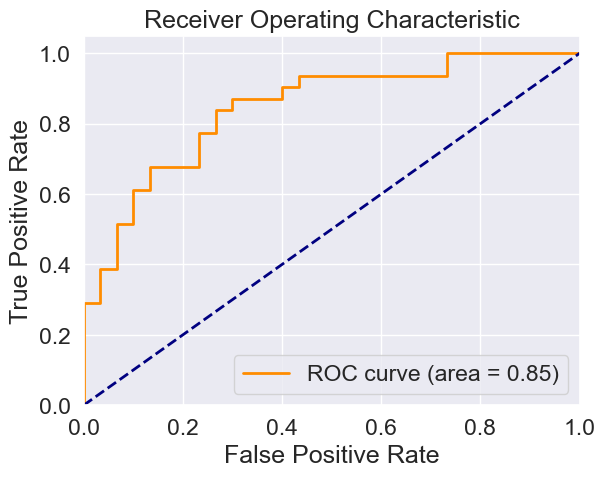

In [158]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming lr_gs is your trained logistic regression model
y_scores = lr_gs.predict_proba(x_test)[:,1]  # Predict probabilities of positive class
fpr, tpr, _ = roc_curve(y_test, y_scores)    # Compute ROC curve
roc_auc = auc(fpr, tpr)                      # Compute Area Under the Curve (AUC)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [159]:
# Importing necessary library
from sklearn.metrics import confusion_matrix

# Setting a threshold (example)
threshold = 0.5  

# Assuming y_scores are the predicted probabilities of the positive class
# Converting predicted probabilities to binary predictions based on the threshold
y_pred = (y_scores > threshold).astype(int)

# Computing the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[18 12]
 [ 3 28]]


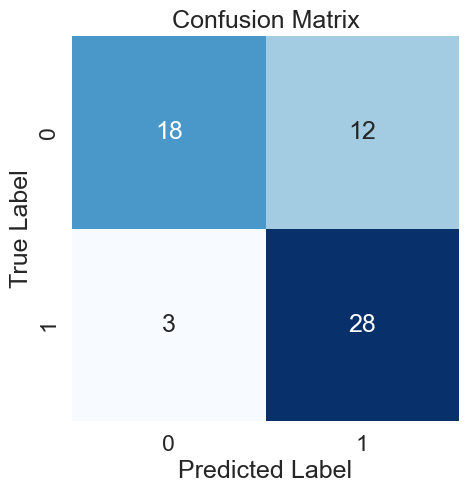

In [160]:
# Setting the font scale for seaborn
sns.set(font_scale=1.5)

def plot_confusion(y_test, y_pred):
    'This function plots the confusion matrix'
    
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(5, 5))
    
    # Plot the confusion matrix as a heatmap
    sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,  # Show the cell values
                fmt='d',     # Formatting for cell values as integers
                cmap='Blues',# Color map for the heatmap
                cbar=False,  # Hide the color bar
                ax=ax)       # Specify the axes to plot on
    
    # Set the axis labels and title
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title('Confusion Matrix')

# Calling the plot_confusion function with the true labels and predicted labels
plot_confusion(y_test, y_pred)

# Plot the classification report

# In Classification we get one train data set

In [161]:
# Assuming y_pred and y_test are the predicted and true labels respectively
classification_rep = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        30
           1       0.70      0.90      0.79        31

    accuracy                           0.75        61
   macro avg       0.78      0.75      0.75        61
weighted avg       0.78      0.75      0.75        61



In [163]:
from sklearn.metrics import classification_report

# Assuming y_pred and y_test are the predicted and true labels respectively
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        30
           1       0.70      0.90      0.79        31

    accuracy                           0.75        61
   macro avg       0.78      0.75      0.75        61
weighted avg       0.78      0.75      0.75        61



# Lets see if cross validation layers help us. search on google: cross validation sklearn

In [164]:
# Create an instance of Logistic Regression with the best hyperparameters
lr = LogisticRegression(C=0.615848211066026, solver='liblinear')

# Perform cross-validation
cv_scores = cross_val_score(lr, x_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print the mean cross-validation score
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.93877551 0.75510204 0.875      0.83333333 0.9375    ]
Mean Cross-Validation Score: 0.8679421768707483


In [77]:
lr_gs.best_params_
# create instance
lr = LogisticRegression(C=0.615848211066026,
                       solver='liblinear')

In [165]:
# Create an instance of Logistic Regression with the best hyperparameters
lr = LogisticRegression(C=0.615848211066026, solver='liblinear')

# Perform cross-validation for accuracy
cv_accuracy = cross_val_score(lr, x, y, cv=7, scoring='accuracy')

# Calculate the mean cross-validated accuracy
cv_accuracy_mean = np.mean(cv_accuracy)

# Print the mean cross-validated accuracy
print("Mean Cross-Validated Accuracy:", cv_accuracy_mean)

Mean Cross-Validated Accuracy: 0.8284506191482934


In [166]:
# Create an instance of Logistic Regression with the best hyperparameters
lr = LogisticRegression(C=0.615848211066026, solver='liblinear')

# Perform cross-validation for precision
cv_precision = cross_val_score(lr, x, y, cv=7, scoring='precision')

# Calculate the mean cross-validated precision
cv_precision_mean = np.mean(cv_precision)

# Print the mean cross-validated precision
print("Mean Cross-Validated Precision:", cv_precision_mean)

Mean Cross-Validated Precision: 0.8108267922553637


In [167]:

# Create an instance of Logistic Regression with the best hyperparameters
lr = LogisticRegression(C=0.615848211066026, solver='liblinear')

# Perform cross-validation for recall
cv_recall = cross_val_score(lr, x, y, cv=7, scoring='recall')

# Calculate the mean cross-validated recall
cv_recall_mean = np.mean(cv_recall)

# Print the mean cross-validated recall
print("Mean Cross-Validated Recall:", cv_recall_mean)

Mean Cross-Validated Recall: 0.89648033126294


In [168]:
# Create an instance of Logistic Regression with the best hyperparameters
lr = LogisticRegression(C=0.615848211066026, solver='liblinear')

# Perform cross-validation for F1 score
cv_f1 = cross_val_score(lr, x, y, cv=7, scoring='f1')

# Calculate the mean cross-validated F1 score
cv_f1_mean = np.mean(cv_f1)

# Print the mean cross-validated F1 score
print("Mean Cross-Validated F1 Score:", cv_f1_mean)

Mean Cross-Validated F1 Score: 0.8508447334977947


# Visulizing Cross Validation Score

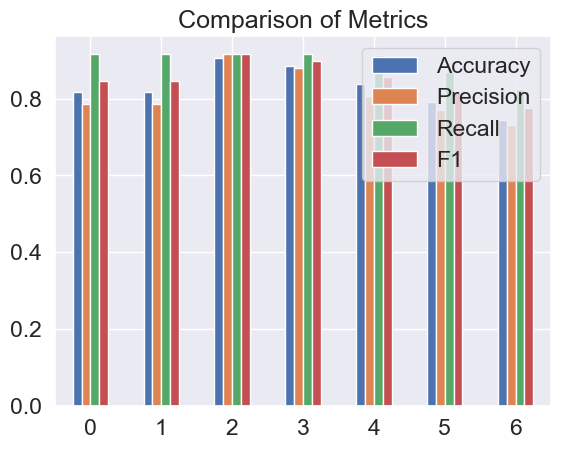

In [169]:
# Assuming cv_accuracy, cv_precision, cv_recall, and cv_f1 are arrays of cross-validation scores
cv_accuracy = cross_val_score(lr, x, y, cv=7, scoring='accuracy')
cv_precision = cross_val_score(lr, x, y, cv=7, scoring='precision')
cv_recall = cross_val_score(lr, x, y, cv=7, scoring='recall')
cv_f1 = cross_val_score(lr, x, y, cv=7, scoring='f1')

# Creating a DataFrame for cross-validation scores
cv_plot = pd.DataFrame({
    'Accuracy': cv_accuracy,
    'Precision': cv_precision,
    'Recall': cv_recall,
    'F1': cv_f1
})

# Plotting the cross-validation scores
cv_plot.plot.bar(title='Comparison of Metrics', legend=True)
plt.xticks(rotation=0)
plt.show()

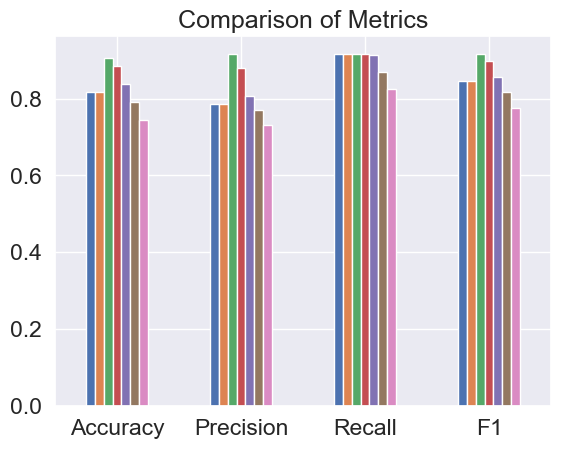

In [171]:
# Assuming cv_accuracy, cv_precision, cv_recall, and cv_f1 are arrays of cross-validation scores
cv_accuracy = cross_val_score(lr, x, y, cv=7, scoring='accuracy')
cv_precision = cross_val_score(lr, x, y, cv=7, scoring='precision')
cv_recall = cross_val_score(lr, x, y, cv=7, scoring='recall')
cv_f1 = cross_val_score(lr, x, y, cv=7, scoring='f1')

# Creating a DataFrame for cross-validation scores
cv_plot = pd.DataFrame({
    'Accuracy': cv_accuracy,
    'Precision': cv_precision,
    'Recall': cv_recall,
    'F1': cv_f1
})

# Plotting the cross-validation scores
cv_plot.T.plot.bar(title='Comparison of Metrics', legend=False)
plt.xticks(rotation=0)
plt.show()

In [172]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [85]:
# check coffiecient
lr.fit(x_train,y_train)

LogisticRegression(C=0.615848211066026, solver='liblinear')

In [86]:
# check coffiecient
lr.fit(x_train,y_train)
lr.coef_

array([[ 0.02252203, -1.36931508,  0.79024727, -0.02405079, -0.00188934,
         0.45440863,  0.40806228,  0.035555  , -0.78437428, -0.56658938,
         0.52894171, -0.64641313, -1.10031521]])

In [87]:

final_coef = dict(zip(df.columns,list(lr.coef_[0])))
final_coef
# positive corelation : is a good sign (are good friend like)
# negative corelation : is a bad sign (are enemy like)

{'age': 0.022522029790988902,
 'sex': -1.369315078530457,
 'cp': 0.7902472653002438,
 'trestbps': -0.024050794197427644,
 'chol': -0.001889344518362533,
 'fbs': 0.454408627822306,
 'restecg': 0.40806227989876553,
 'thalach': 0.03555499572128291,
 'exang': -0.7843742791918811,
 'oldpeak': -0.5665893803503371,
 'slope': 0.5289417069090245,
 'ca': -0.6464131290428378,
 'thal': -1.1003152092892416}

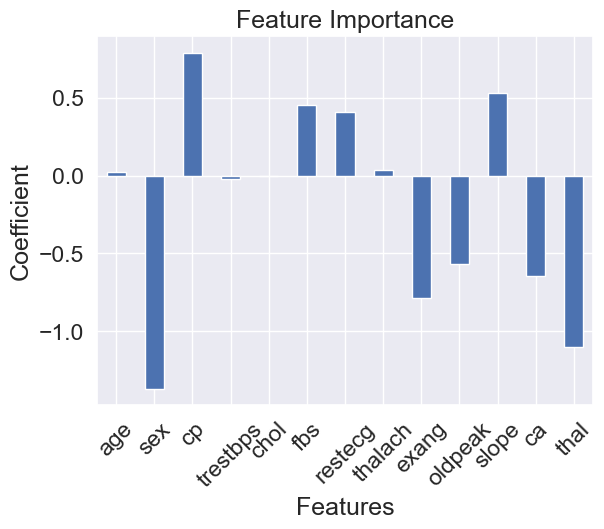

In [173]:
# Assuming final_coef is the dictionary containing feature coefficients
features = pd.DataFrame(final_coef, index=[0])

# Transpose the DataFrame to have features as rows
features = features.T

# Plotting the feature importance
features.plot.bar(title='Feature Importance', legend=False)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.show()

# Conclusion


# Based on the analysis and modeling this performed, we can draw several conclusions:


# Model Performance: 
Evaluate the performance of the trained models (such as logistic regression, random forest) using various metrics like accuracy, precision, recall, and F1 score. Choose the model that performs the best on your dataset based on these metrics.



# Feature Importance: 
Identify which features have the most impact on predicting the target variable by examining the coefficients (or feature importances) of the selected model. This can help in understanding the underlying factors driving the predictions.


# Hyperparameter Tuning: 
Tune the hyperparameters of the selected model (e.g., using grid search or randomized search) to optimize its performance further.



# Cross-Validation: 
Assess the robustness of the model using cross-validation, which helps in estimating how well the model will generalize to unseen data.



# Visualization: 
Visualize the results of the analysis, including the model performance metrics, feature importance, and cross-validation scores, to communicate the findings effectively.

Overall, your conclusions should provide insights into the dataset, the predictive performance of the models, and the importance of different features in making predictions. These insights can guide further analysis or decision-making processes based on the problem you're trying to solve.


We set 95% accuracy goal, but we did not meet

We can ask some Question

What if we try to get more data

what if we try to improve the quality of the data

What if we try to use other models and see if there is any improvement